In [2]:
import re 
import tweepy 
from tweepy import OAuthHandler
import pandas as pd
import numpy as np

In [5]:
tweets = pd.read_csv("/media/alessandro/storage/Tesi/locale/twitter-sentiment-analysis2/train.csv", encoding='latin-1')

In [12]:
tweets.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [14]:
from sentistrength import PySentiStr

senti = PySentiStr()

senti.setSentiStrengthPath('/media/alessandro/storage/Tesi/locale/sentiStrength/SentiStrength.jar')
senti.setSentiStrengthLanguageFolderPath('/media/alessandro/storage/Tesi/locale/sentiStrength/SentiStrength_Data/')

str_arr = tweets.SentimentText

result = senti.getSentiment(str_arr, score='scale')

print(result)

[-0.5, -0.25, 0.25, -0.5, -0.75, -0.75, 0.5, 0.0, 0.0, 0.25, 0.5, -0.75, -0.25, 0.25, 0.0, 0.0, -0.25, 0.5, -1.0, 0.25, -0.75, 0.25, 1.0, 0.0, 0.25, 0.25, -0.25, -0.25, 0.0, 0.25, -0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.25, 0.25, -0.5, 0.0, 0.0, 0.0, 0.25, 0.5, 0.25, -0.75, 0.0, 0.0, 0.25, 0.0, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, -0.75, 0.0, 0.0, 0.25, -0.75, 0.0, 0.0, 0.0, -0.5, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.5, 0.0, 0.25, 0.0, 0.25, 0.5, 0.5, -0.5, 0.25, 0.0, -0.25, 0.25, 0.25, 0.0, 0.0, 0.25, 0.5, 0.5, -0.75, 0.5, 0.0, -0.25, 0.25, 0.25, 0.0, 0.25, 0.5, 0.5, -0.25, 0.0, -0.25, 0.25, 0.25, 0.0, -0.75, 0.25, 0.0, 0.0, 0.25, -0.75, 0.0, 0.25, 0.0, 0.0, -0.5, -0.25, 0.0, 0.0, 0.25, 0.25, -0.25, 0.25, -0.5, 0.25, 0.0, -0.5, 0.0, 0.0, -0.5, 0.75, 0.0, 0.25, 0.75, 0.0, -0.25, -0.5, 0.25, -0.25, -0.25, 0.0, 0.25, 0.0, 0.0, -0.75, -0.5, -0.25, 0.5, -0.75, 0.25, 0.0, 0.0, 0.0, 0.25, -0.5, 0.25, 0.5, 0.0, -0.25, -0.25, 0.5, 0.0, -0.25, 0.0, 0.5, 0.0, 0.25, 0.25, 0.5, 0.0, 0.5,

In [17]:
index_list = []

for i,el in enumerate(result):
    if el==0:
        index_list.append(i)
        
len(index_list)
len(result)

99989

In [18]:
#elimino i tweet che SentiStrength classifica come neutrali al fine di calcolare lo score F1-measure 
#solo su positivi e negativi in maniera coerente a come il dataset originale è etichettato
tweets = tweets.drop(index_list)

In [19]:
str_arr = tweets.SentimentText

result = senti.getSentiment(str_arr, score='scale')

print(result)

[-0.5, -0.25, 0.25, -0.5, -0.75, -0.75, 0.5, 0.25, 0.5, -0.75, -0.25, 0.25, -0.25, 0.5, -1.0, 0.25, -0.75, 0.25, 1.0, 0.25, 0.25, -0.25, -0.25, 0.25, -0.75, 0.5, 0.25, 0.25, -0.5, 0.25, 0.5, 0.25, -0.75, 0.25, 0.5, 0.5, 0.5, 0.5, -0.75, 0.25, -0.75, -0.5, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.5, 0.5, -0.5, 0.25, -0.25, 0.25, 0.25, 0.25, 0.5, 0.5, -0.75, 0.5, -0.25, 0.25, 0.25, 0.25, 0.5, 0.5, -0.25, -0.25, 0.25, 0.25, -0.75, 0.25, 0.25, -0.75, 0.25, -0.5, -0.25, 0.25, 0.25, -0.25, 0.25, -0.5, 0.25, -0.5, -0.5, 0.75, 0.25, 0.75, -0.25, -0.5, 0.25, -0.25, -0.25, 0.25, -0.75, -0.5, -0.25, 0.5, -0.75, 0.25, 0.25, -0.5, 0.25, 0.5, -0.25, -0.25, 0.5, -0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, -0.25, -0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, -0.25, 0.25, -0.25, -0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.25, -0.5, -0.25, 0.25, 0.25, 0.5, 0.25, -0.25, 0.25, -0.75, 0.5, 0.5, -0.5, 0.5, 0.25, 0.5, -0.75, 0.25, -0.5, -0.5, -0.25, 0.25, 0.25, -1.0, -1.0, 0.5, 0.25, -0.75, 0.25, 0.75,

In [22]:
tweets['SentiStrengthSentiment']=result

tweets.head()

,ItemID,Sentiment,SentimentText,SentiStrengthSentiment
0,1,0,is so sad for my APL frie...,-0.50
1,2,0,I missed the New Moon trail...,-0.25
2,3,1,omg its already 7:30 :O,0.25
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,-0.50
4,5,0,i think mi bf is cheating on me!!! ...,-0.75


In [24]:
tweets.SentiStrengthSentiment = (tweets.SentiStrengthSentiment > 0).astype(int)

tweets.head()

,ItemID,Sentiment,SentimentText,SentiStrengthSentiment
0,1,0,is so sad for my APL frie...,0
1,2,0,I missed the New Moon trail...,0
2,3,1,omg its already 7:30 :O,1
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,5,0,i think mi bf is cheating on me!!! ...,0


In [31]:
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

print('\nf1-score:\n\n',f1_score(tweets.Sentiment, tweets.SentiStrengthSentiment))

print('\n confussion matrix:\n\n',confusion_matrix(tweets.Sentiment, tweets.SentiStrengthSentiment))


f1-score:

 0.7829330482902986

 confussion matrix:

 [[13663 14291]
 [ 5204 35158]]


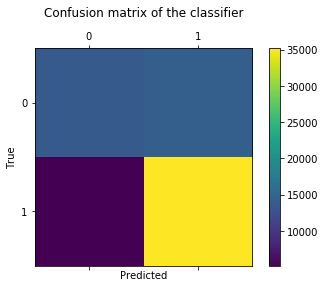

In [33]:
labels = ['0', '1']
cm = confusion_matrix(tweets.Sentiment, tweets.SentiStrengthSentiment)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()